## 1. Classic ML Implementation

In [3]:
import os
import pandas as pd
pd.set_option("display.max_columns", 100)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 1.1 Data Preparation

In [4]:
data_path = "data/Day3_Threat_Detection/"
files = [os.path.join(data_path, file) for file in os.listdir(data_path) if file.endswith(".parquet")]
files

['data/Day3_Threat_Detection/DDoS-Friday-no-metadata.parquet',
 'data/Day3_Threat_Detection/Bruteforce-Tuesday-no-metadata.parquet',
 'data/Day3_Threat_Detection/Botnet-Friday-no-metadata.parquet',
 'data/Day3_Threat_Detection/DoS-Wednesday-no-metadata.parquet',
 'data/Day3_Threat_Detection/Benign-Monday-no-metadata.parquet',
 'data/Day3_Threat_Detection/Infiltration-Thursday-no-metadata.parquet',
 'data/Day3_Threat_Detection/Portscan-Friday-no-metadata.parquet',
 'data/Day3_Threat_Detection/WebAttacks-Thursday-no-metadata.parquet']

In [5]:
df = pd.concat((pd.read_parquet(file) for file in files), ignore_index=True)
df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.687500,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,6,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311523,9174.311523,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,6,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769531,19230.769531,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,6,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.765625,29411.765625,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,6,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.687500,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [6]:
df.shape

(2313810, 78)

In [7]:
df['Label'].value_counts()

Label
Benign                        1977318
DoS Hulk                       172846
DDoS                           128014
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
PortScan                         1956
Web Attack � Brute Force         1470
Bot                              1437
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [8]:
df.isnull().sum().sum()

0

In [9]:
df['Label'] = df['Label'].astype('category').cat.codes

In [10]:
df['Label'].value_counts()

Label
0     1977318
4      172846
2      128014
3       10286
7        5931
6        5385
5        5228
11       3219
10       1956
12       1470
1        1437
14        652
9          36
13         21
8          11
Name: count, dtype: int64

In [11]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('Label', axis=1)), columns=df.columns[:-1])

df_scaled['Label'] = df['Label']

In [12]:
df_scaled.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,-0.832109,-0.496474,-0.010955,-0.011379,-0.059222,-0.007898,-0.311428,-0.243503,-0.310448,-0.269557,-0.505047,-0.657005,-0.571487,-0.449771,0.434036,5.199782,-0.323744,-0.407352,-0.421579,-0.059017,-0.48704,-0.305362,-0.379787,-0.413751,-0.130922,-0.38596,-0.225788,-0.263438,-0.304488,-0.128953,-0.199676,0.0,-0.003153,0.0,0.001368,0.001734,5.728868,-0.145730,-0.485268,-0.526165,-0.617051,-0.526285,-0.32921,-0.183966,-0.199676,-0.017221,-0.610895,1.574718,-0.315015,-0.003153,-0.017259,-0.994792,-0.627965,-0.310448,-0.571487,0.0,0.0,0.0,0.0,0.0,0.0,-0.010955,-0.059301,-0.011379,-0.007898,-0.486996,-0.242720,-0.007867,0.002817,-0.139319,-0.115799,-0.16558,-0.11186,-0.394724,-0.121234,-0.400429,-0.379827,0
1,-0.832109,-0.496471,-0.012161,-0.010473,-0.059765,-0.007896,-0.311428,-0.243503,-0.310448,-0.269557,-0.502196,-0.574983,-0.562273,-0.449771,-0.047924,-0.016781,-0.323722,-0.407352,-0.421575,-0.058983,-0.48704,-0.305362,-0.379787,-0.413751,-0.130923,-0.38596,-0.225788,-0.263438,-0.304488,-0.128953,-0.199676,0.0,-0.003153,0.0,0.001367,0.001746,-0.060692,0.155421,-0.485268,-0.526165,-0.617051,-0.526285,-0.32921,-0.183966,-0.199676,-0.017221,-0.610895,1.574718,3.174456,-0.003153,-0.017259,0.415725,-0.627965,-0.310448,-0.562273,0.0,0.0,0.0,0.0,0.0,0.0,-0.012161,-0.059844,-0.010473,-0.007896,-0.487266,-0.213493,-0.009287,0.002817,-0.139319,-0.115799,-0.16558,-0.11186,-0.394724,-0.121234,-0.400429,-0.379827,0
2,-0.832109,-0.496473,-0.012161,-0.010473,-0.059765,-0.007896,-0.311428,-0.243503,-0.310448,-0.269557,-0.502196,-0.574983,-0.562273,-0.449771,-0.032972,0.145054,-0.323734,-0.407352,-0.421578,-0.059001,-0.48704,-0.305362,-0.379787,-0.413751,-0.130923,-0.38596,-0.225788,-0.263438,-0.304488,-0.128953,-0.199676,0.0,-0.003153,0.0,0.001367,0.001746,0.027861,0.485528,-0.485268,-0.526165,-0.617051,-0.526285,-0.32921,-0.183966,-0.199676,-0.017221,-0.610895,1.574718,3.174456,-0.003153,-0.017259,0.415725,-0.627965,-0.310448,-0.562273,0.0,0.0,0.0,0.0,0.0,0.0,-0.012161,-0.059844,-0.010473,-0.007896,-0.487266,-0.213493,-0.009287,0.002817,-0.139319,-0.115799,-0.16558,-0.11186,-0.394724,-0.121234,-0.400429,-0.379827,0
3,-0.832109,-0.496473,-0.012161,-0.010473,-0.059765,-0.007896,-0.311428,-0.243503,-0.310448,-0.269557,-0.502196,-0.574983,-0.562273,-0.449771,-0.017835,0.308892,-0.323737,-0.407352,-0.421578,-0.059007,-0.48704,-0.305362,-0.379787,-0.413751,-0.130923,-0.38596,-0.225788,-0.263438,-0.304488,-0.128953,-0.199676,0.0,-0.003153,0.0,0.001367,0.001746,0.117509,0.819724,-0.485268,-0.526165,-0.617051,-0.526285,-0.32921,-0.183966,-0.199676,-0.017221,-0.610895,1.574718,3.174456,-0.003153,-0.017259,0.415725,-0.627965,-0.310448,-0.562273,0.0,0.0,0.0,0.0,0.0,0.0,-0.012161,-0.059844,-0.010473,-0.007896,-0.

In [13]:


x = df_scaled.drop('Label', axis=1)
y = df_scaled['Label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


### 1.2 Model building

In [14]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)


params = {
    'objective': 'multiclass',          
    'num_class': len(y_train.unique()),  
    'metric': 'multi_logloss',           
    'boosting_type': 'gbdt',             
    'learning_rate': 0.05,               
    'max_depth': -1,                     
    'num_leaves': 31,                    
    'verbose': -1                        
}


model = lgb.train(
    params, 
    train_data, 
    valid_sets=[test_data], 
    num_boost_round=100
    )


y_pred_probs = model.predict(x_test)  

y_pred = [list(x).index(max(x)) for x in y_pred_probs]



In [17]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100}')

Accuracy: 97.34874514329181


Text(50.722222222222214, 0.5, 'True labels')

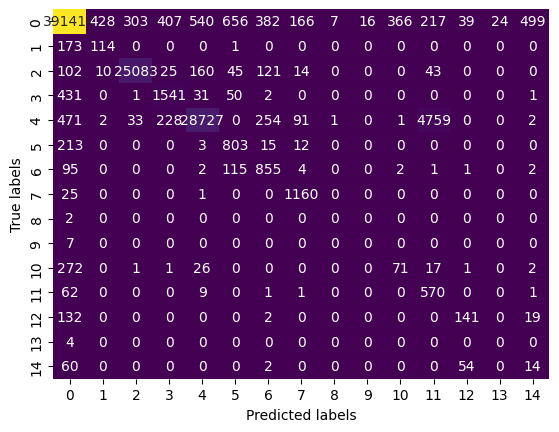

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    cmap='viridis',
    cbar=False
)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    395464
           1       0.21      0.40      0.27       288
           2       0.99      0.98      0.98     25603
           3       0.70      0.75      0.72      2057
           4       0.97      0.83      0.90     34569
           5       0.48      0.77      0.59      1046
           6       0.52      0.79      0.63      1077
           7       0.80      0.98      0.88      1186
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         7
          10       0.16      0.18      0.17       391
          11       0.10      0.89      0.18       644
          12       0.60      0.48      0.53       294
          13       0.00      0.00      0.00         4
          14       0.03      0.11      0.04       130

    accuracy                           0.97    462762
   macro avg       0.44      0.54      0.46    462762
weighted avg       0.99   

In [20]:
model

### 1.3 Model Deployment

In [21]:
import joblib

joblib.dump(model, 'data/Day3_Threat_Detection/model/lightgbm_threat_detection_model.pkl')


['data/Day3_Threat_Detection/model/lightgbm_threat_detection_model.pkl']

In [22]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the trained model
model = joblib.load('data/Day3_Threat_Detection/model/lightgbm_threat_detection_model.pkl')

@app.route('/', methods=['GET'])
def home():
    return "Welcome to the Threat Detection API! Use the /predict endpoint to make predictions."

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json['data']
    y_pred_probs = model.predict(data)
    y_pred = [list(x).index(max(x)) for x in y_pred_probs]
    return jsonify({'prediction': str(y_pred)})

if __name__ == '__main__':
    app.run(debug=True, port=5001) 
